In [2]:
# import requests
# import json 
# import csv 
# import pandas as pd
# from functools import reduce
# import glob
# import datetime
# from datetime import timedelta
# from datetime import datetime
# import matplotlib.pyplot as plt
# import time

##### Creating file name

In [186]:
link = input('Enter link to get data: ')

Enter link to get data: http://35.154.232.43:1200/api/stops/new?startTime=2020-02-25T10:00:00&endTime=2020-02-25T19:00:00


In [187]:
if '35.154.232.43:1200' in link:
    file_name = link.split('startTime=')[1][0:10] + '-600BPH'
elif '13.232.241.117:1200' in link:
    file_name = link.split('startTime=')[1][0:10] + '-2000BPH'
file_name

'2020-02-25-600BPH'

###### Reading json data in python file by hitting a link

In [188]:
import requests

r = requests.get(link)
# print (r.json())

# loading the data into the variable data 
a = r.json()

# Storing length of file in a variable
file_length = len(a)
# len(a)

In [189]:
# *RUN THIS CELL ONLY ONCE*

# Python program to write JSON to a file  
import json 
  
# Data to be written 
with open(file_name+".json", "w") as outfile: 
    json.dump(a, outfile) 

###### Python program to convert JSON file to CSV

In [190]:
# import json 
import csv 
  
# Opening JSON file and loading the data into the variable data 
with open(file_name+'.json') as json_file: 
    data = json.load(json_file) 

In [191]:
# Converting json to csv 

# now we will open a file for writing 
data_file = open(file_name+'-1_main_file.csv', 'w', newline = '') 
  
# create the csv writer object 
csv_writer = csv.writer(data_file) 
  
# Counter variable used for writing  
# headers to the CSV file 
count = 0
  
for dt in data: 
    
    if count == 0: 
        # Writing headers of CSV file 
        header = dt.keys() 
        csv_writer.writerow(header) 
        count += 1
        
    # Writing data of CSV file 
    csv_writer.writerow(dt.values()) 
    
data_file.close() 

###### REMOVING THE UNDEFINED DATA ROWS FROM THE FILE AND WRITING IN NEW FILE

In [192]:
# import csv
with open(file_name+'-1_main_file.csv', 'r') as inp, open(file_name+'-2_removedUNDEFINED.csv', 'w', newline = '') as out:
    writer = csv.writer(out)
    for row in csv.reader(inp):
        try:
            if row[5].isdigit() != 0 or row[5]=='__v':
                writer.writerow(row)
        except IndexError:
            continue
            
inp.close()
out.close()

###### FIND AND REPLACE OPERATIONS IN DATAFRAME 

In [194]:
#  REPLACING Z with '' AND T with ' ' in start_time and end_time columns

import pandas as pd

df = pd.read_csv(file_name+'-2_removedUNDEFINED.csv')

df['start_time'] = df['start_time'].str.replace('Z', '')
df['start_time'] = df['start_time'].str.replace('T', ' ')
df['end_time'] = df['end_time'].str.replace('Z', '')
df['end_time'] = df['end_time'].str.replace('T', ' ')

# COMMITING THE CHANGES MADE IN DATAFRAME TO THE SAME CSV FILE
df.to_csv(file_name+'-2_find_replace.csv', index=False)

######  Mapping fault names from different files to main file 

In [195]:
from functools import reduce
import glob

file1 = glob.glob(file_name+'-2_find_replace.csv')
df1 = [pd.read_csv(fp) for fp in file1]
# df1 
# '''[1601 rows x 6 columns]'''

In [196]:
# df2 = reduce(lambda left,right: pd.merge(left,right,on='stop_name'), df1)

In [197]:
# import glob

file2_1 = glob.glob('case_packer.csv')
df2_11 = [pd.read_csv(fp, index_col = ['stop_name']) for fp in file2_1]

df2_12 = pd.concat(df2_11)
df2_12['machine_name'] = 'case_packer'
# df2_12

df2_case_packer = pd.merge(df, df2_12, on=['stop_name', 'machine_name'])
# df2_case_packer

total_case_packer = df2_case_packer['start_time'].count() 

In [198]:
file2_2 = glob.glob('case_erector.csv')
df2_21 = [pd.read_csv(fp, index_col = ['stop_name']) for fp in file2_2]

df2_22 = pd.concat(df2_21)
df2_22['machine_name'] = 'case_erector'
# df2_22

df2_case_erector=pd.merge(df, df2_22, on=['stop_name', 'machine_name'])
# df2_case_erector

total_case_erector = df2_case_erector['start_time'].count() 

In [199]:
file2_3 = glob.glob('filler.csv')
df2_31 = [pd.read_csv(fp, index_col = ['stop_name']) for fp in file2_3]

df2_32 = pd.concat(df2_31)
df2_32['machine_name'] = 'filler'
# df2_32

df2_filler=pd.merge(df, df2_32, on=['stop_name', 'machine_name'])
# df2_filler

total_filler = df2_filler['start_time'].count() 

In [200]:
file2_4 = glob.glob('labeller.csv')
df2_41 = [pd.read_csv(fp, index_col = ['stop_name']) for fp in file2_4]

df2_42 = pd.concat(df2_41)
df2_42['machine_name'] = 'labeller'
# df2_42

df2_labeller=pd.merge(df, df2_42, on=['stop_name', 'machine_name'])
# df2_labeller

total_labeller = df2_labeller['start_time'].count() 

In [201]:
file2_5 = glob.glob('palletiser.csv')
df2_51 = [pd.read_csv(fp, index_col = ['stop_name']) for fp in file2_5]

df2_52 = pd.concat(df2_51)
df2_52['machine_name'] = 'palletiser'
# df2_52

df2_palletiser=pd.merge(df, df2_52, on=['stop_name', 'machine_name'])
# df2_palletiser

total_palletiser = df2_palletiser['start_time'].count() 

In [202]:
file2_6 = glob.glob('vertilator.csv')
df2_61 = [pd.read_csv(fp, index_col = ['stop_name']) for fp in file2_6]

df2_62 = pd.concat(df2_61)
df2_62['machine_name'] = 'vertilator'
# df2_62

df2_vertilator=pd.merge(df, df2_62, on=['stop_name', 'machine_name'])
# df2_vertilator

total_vertilator = df2_vertilator['start_time'].count() 

In [203]:
file2_7 = glob.glob('case_sealer.csv')
df2_71 = [pd.read_csv(fp, index_col = ['stop_name']) for fp in file2_7]

df2_72 = pd.concat(df2_71)
df2_72['machine_name'] = 'case_sealer'
# df2_72

df2_case_sealer=pd.merge(df, df2_72, on=['stop_name', 'machine_name'])
# df2_case_sealer

total_case_sealer = df2_case_sealer['start_time'].count() 

In [204]:
file2_8 = glob.glob('induction.csv')
df2_81 = [pd.read_csv(fp, index_col = ['stop_name']) for fp in file2_8]

df2_82 = pd.concat(df2_81)
df2_82['machine_name'] = 'induction'
# df2_82

df2_induction=pd.merge(df, df2_82, on=['stop_name', 'machine_name'])
# df2_induction

total_induction = df2_induction['start_time'].count() 

In [205]:
# Concatenating all the dataframes mapped differently

df2 = pd.concat([df2_case_erector, df2_case_packer, df2_case_sealer, df2_filler, df2_induction, df2_labeller, df2_palletiser, df2_vertilator], axis=0)

In [206]:
# Reflecting the concatenated values to the csv file

df2.to_csv(file_name+'-3_mapped_faults.csv', index=False)

###### Creating file with only fault values excluding the fault type such as ready, pdt, running, waiting, etc.

In [207]:
df2_3 = pd.read_csv(file_name+'-3_mapped_faults.csv')
# df2_3

In [208]:
# other_stop_types = ['pdt', 'running', 'waiting', 'manual_stop', 'blocked', 'ready']

In [209]:
df2_41 = df2_3[df2_3.stop_name != 'pdt']
# df2_41

In [210]:
df2_42 = df2_41[df2_41.stop_name != 'running']
# df2_42

In [211]:
df2_43 = df2_42[df2_42.stop_name != 'waiting']

In [212]:
df2_44 = df2_43[df2_43.stop_name != 'manual_stop']

In [213]:
df2_45 = df2_44[df2_44.stop_name != 'blocked']

In [214]:
df2_46 = df2_45[df2_45.stop_name != 'ready']
# df2_46

In [215]:
# contains all the values in file only for faults
df2_46.to_csv(file_name+'-3_only_faults.csv', index=False)

###### Appending difference of TIMESTAMP COLUMNS TO CSV FILE

In [216]:
# import pandas as pd
csv_input = pd.read_csv(file_name+'-3_mapped_faults.csv')

end_time = list(csv_input['end_time'])
start_time = list(csv_input['start_time'])

In [217]:
# Calculating difference etween the end and start time

import datetime
from datetime import timedelta
 
datetimeFormat = '%Y-%m-%d %H:%M:%S.%f'
list3 = []
for i in range(len(csv_input)):
    date1 = end_time[i]
    date2 = start_time[i]
    diff = datetime.datetime.strptime(date1, datetimeFormat)\
        - datetime.datetime.strptime(date2, datetimeFormat)
    
    list3.append(diff)

# list3

In [218]:
# storing diff in list

import time 
from datetime import datetime

  
def convert(seconds): 
    return time.strftime("%H:%M:%S", time.gmtime(seconds)) 

def convert_timedelta(duration):
    return duration.seconds

list3_1=[]
for i in list3:
    seconds = convert_timedelta(i)
    # Driver program 
    list3_1.append( convert(int(seconds)) )

# list3_1

In [219]:
# reflecting diff to the main csv file

# all faults
df4 = pd.read_csv(file_name+'-3_mapped_faults.csv')

df4_1 = pd.DataFrame(list3_1,columns = ['time_diff'])
df4['time_diff']  = df4_1

df4.to_csv(file_name+'-4_time_diff.csv', index=False)

###### Creating Frequency Count File


In [220]:
# Frequency Count in a dataframe

df5 = pd.read_csv(file_name+'-4_time_diff.csv')

df5_1 = pd.DataFrame({'fault_frequency' : df5.groupby(['machine_name', 'fault_name'])['time_diff'].count()}).reset_index()
# df5_1

In [221]:
# contains frequency of all types of stops
df5_1.to_csv(file_name+'-5_fault_frequency.csv', index=False)

###### Plot fault frequency for all the types of faults such as pdt,ready,faults,etc.

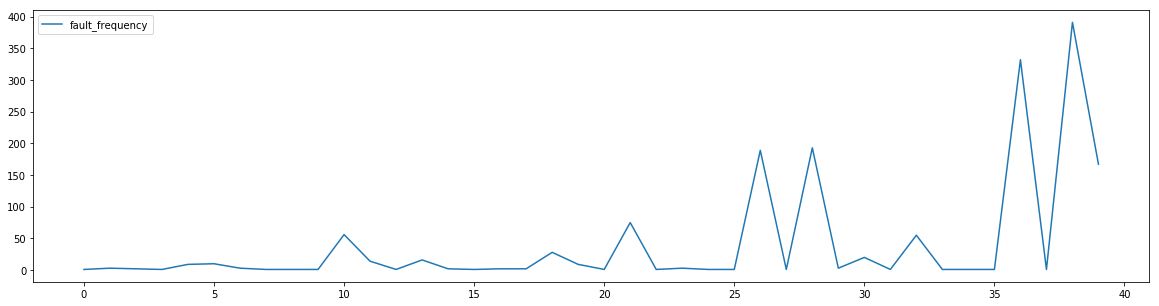

In [222]:
df5_1.plot(figsize = (20,5))

In [223]:
df5_2 = df5_1[df5_1.fault_name != 'pdt']

In [224]:
df5_2 = df5_2[df5_2.fault_name != 'waiting']

In [225]:
df5_2 = df5_2[df5_2.fault_name != 'ready']

In [226]:
df5_2 = df5_2[df5_2.fault_name != 'blocked']

In [227]:
df5_2 = df5_2[df5_2.fault_name != 'manual_stop']

In [228]:
# contains frequency only for faults
df5_2.to_csv(file_name+'-5_fault_frequency_only_faults.csv', index=False)

###### Plot fault frequency only for faults 

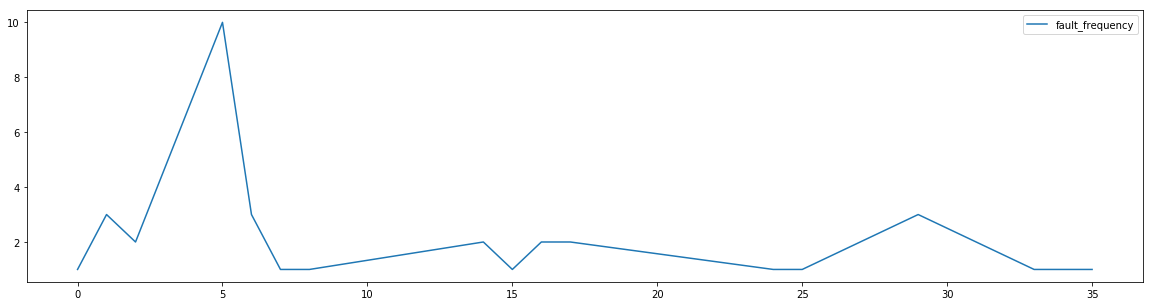

In [229]:
df5_2.plot(figsize = (20,5))

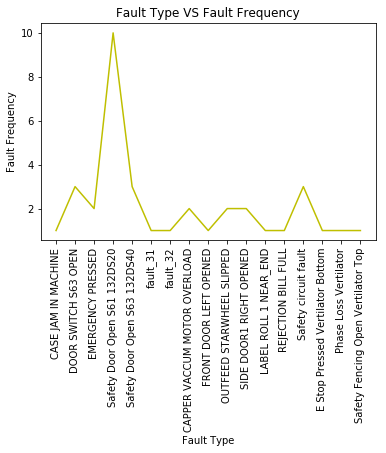

In [230]:
# fault values per faults

import matplotlib.pyplot as plt

plt.plot(df5_2['fault_name'],df5_2['fault_frequency'], color = 'y')

plt.title('Fault Type VS Fault Frequency')
plt.xlabel('Fault Type')
plt.ylabel('Fault Frequency')
plt.xticks(rotation=90)
plt.show()

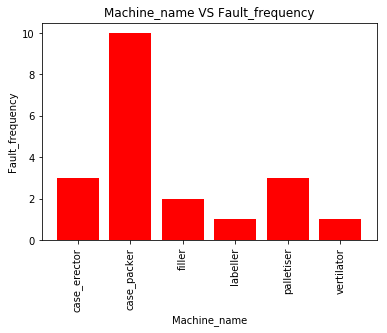

In [231]:
# fault values per machine

import matplotlib.pyplot as plt

plt.bar(df5_2['machine_name'],df5_2['fault_frequency'], color = 'r')

plt.title('Machine_name VS Fault_frequency')
plt.xlabel('Machine_name')
plt.ylabel('Fault_frequency')
plt.xticks(rotation=90)
plt.show()

###### Remove Lunch Time Values from the file

In [233]:
# lunch time
# 12:50:00  2:30:00

In [235]:
df6_1 = df5.start_time

In [236]:
st_time = input('Enter Lunch start time in 24 hrs format: ')

Enter Lunch start time in 24 hrs format: 12:50


In [237]:
st_ti = st_time.split(':')
st_hr = st_ti[0]
st_min = st_ti[1]

In [238]:
ed_time = input('Enter Lunch end time in 24 hrs format: ')

Enter Lunch end time in 24 hrs format: 14:30


In [239]:
ed_ti = ed_time.split(':')
ed_hr = ed_ti [0]
ed_min = ed_ti [1]

In [240]:
df6 = pd.read_csv(file_name+'-4_time_diff.csv')

# from datetime import datetime
format1 = '%Y-%m-%d %H:%M:%S.%f'
start = df6_1[1]
end = df6_1[len(df6_1)-1]

remove = [] 
for i in df6_1 :
    nw = datetime.strptime(i, format1)
    print(nw)
    hrs = nw.hour;mins = nw.minute;secs = nw.second;
    zero = timedelta(seconds = secs+mins*60+hrs*3600)
    st = nw - zero # this take me to 0 hours. 
    time1 = st + timedelta(seconds= int(st_hr)*3600 + int(st_min)*60) # this gives 12:50 PM
    time2 = st + timedelta(seconds= int(ed_hr)*3600 + int(ed_min)*60)  # this gives 2:30 PM
    
    if nw>= time1 and nw <= time2:
        remove.append(i)
    else:
        pass

2020-02-25 04:30:00
2020-02-25 07:17:36.092000
2020-02-25 08:30:01.664000
2020-02-25 10:13:52.568000
2020-02-25 12:09:43.690000
2020-02-25 13:20:59.189000
2020-02-25 13:26:44.219000
2020-02-25 13:28:54.235000
2020-03-11 08:30:03.004000
2020-02-25 07:15:11.056000
2020-02-25 12:07:48.672000
2020-02-25 13:26:24.218000
2020-02-25 07:30:01.156000
2020-02-25 09:42:52.330000
2020-02-25 13:28:39.229000
2020-02-25 13:20:54.184000
2020-02-25 04:30:00
2020-02-25 06:05:02.461000
2020-02-25 06:05:34.468000
2020-02-25 06:08:34.494000
2020-02-25 06:08:46.496000
2020-02-25 06:09:14.501000
2020-02-25 06:09:26.501000
2020-02-25 06:10:02.507000
2020-02-25 06:10:38.515000
2020-02-25 06:19:54.605000
2020-02-25 06:20:38.614000
2020-02-25 08:47:43.842000
2020-02-25 08:52:31.879000
2020-02-25 08:52:47.878000
2020-02-25 08:53:11.896000
2020-02-25 08:53:51.890000
2020-02-25 08:55:55.904000
2020-02-25 08:58:51.921000
2020-02-25 09:01:19.937000
2020-02-25 09:08:03.959000
2020-02-25 09:09:35.967000
2020-02-25 09:1

2020-02-25 05:19:45.987000
2020-02-25 05:20:41.989000
2020-02-25 05:21:05.992000
2020-02-25 05:22:02.009000
2020-02-25 05:22:34.005000
2020-02-25 05:23:30.014000
2020-02-25 05:24:10.013000
2020-02-25 05:25:38.022000
2020-02-25 05:26:10.023000
2020-02-25 05:26:58.026000
2020-02-25 05:27:38.031000
2020-02-25 05:28:26.042000
2020-02-25 05:31:38.072000
2020-02-25 05:37:14.114000
2020-02-25 05:38:26.119000
2020-02-25 05:39:38.128000
2020-02-25 05:40:18.113000
2020-02-25 05:41:06.131000
2020-02-25 05:41:46.116000
2020-02-25 05:42:58.123000
2020-02-25 05:43:14.136000
2020-02-25 05:45:46.126000
2020-02-25 05:46:26.130000
2020-02-25 05:47:06.130000
2020-02-25 05:48:34.133000
2020-02-25 05:49:22.134000
2020-02-25 05:50:10.136000
2020-02-25 05:51:38.138000
2020-02-25 05:52:02.139000
2020-02-25 05:52:34.158000
2020-02-25 05:53:06.150000
2020-02-25 05:53:54.171000
2020-02-25 05:55:06.167000
2020-02-25 05:55:54.174000
2020-02-25 05:56:26.182000
2020-02-25 05:57:06.183000
2020-02-25 05:58:10.197000
2

In [26]:
# remove

In [27]:
# df6_1

In [241]:
df7 = df6

In [242]:
# df7

In [243]:
for j in remove:
    df7 = df7[df7.start_time != j]

In [244]:
# df7

In [245]:
df7.to_csv(file_name+'-6_time_diff_removed_lunch.csv',index=False)

##### Removig faults other then main faults

In [246]:
df8 = pd.read_csv(file_name+'-6_time_diff_removed_lunch.csv')

In [247]:
other_stops = ['pdt', 'running', 'blocked', 'waiting', 'manual_stop', 'ready']

In [248]:
for j in other_stops:
    df8 = df8[df8.stop_name != j]

In [249]:
df8.to_csv(file_name+'-7_sum.csv',index=False)

##### Sum of time diffs for only faults

In [250]:
df8_1 = pd.DataFrame({'fault_frequency' : df8.groupby(['machine_name'])['time_diff'].sum()}).reset_index()
# df8_1

In [251]:
machine_name = ['case_erector', 'case_packer', 'filler', 'labeller', 'palletiser', 'vertilator']
time_sum = []

In [252]:
df8_case_erector = ([df8_1.fault_frequency[0][i:i+8] for i in range(0, len(df8_1.fault_frequency[0]), 8)]) 
df8_case_erector

['00:02:25', '00:01:55', '00:31:00']

In [254]:
import datetime

sum = datetime.timedelta()
for i in df8_case_erector:
    (h, m, s) = i.split(':')
    d = datetime.timedelta(hours=int(h), minutes=int(m), seconds=int(s))
    sum += d
print(str(sum))
time_sum.append(str(sum))
# time_sum

0:35:20


In [134]:
df8_case_packer = ([df8_1.fault_frequency[1][i:i+8] for i in range(0, len(df8_1.fault_frequency[1]), 8)]) 
df8_case_packer

['00:00:19',
 '00:00:48',
 '00:00:20',
 '00:17:40',
 '00:00:16',
 '00:00:12',
 '00:00:16',
 '00:00:23',
 '00:00:20',
 '00:00:16',
 '00:01:16',
 '00:00:12',
 '00:01:44',
 '00:00:12']

In [135]:
# import datetime

sum = datetime.timedelta()
for i in df8_case_packer:
    (h, m, s) = i.split(':')
    d = datetime.timedelta(hours=int(h), minutes=int(m), seconds=int(s))
    sum += d
print(str(sum))
time_sum.append(str(sum))
time_sum

0:24:14


['0:35:20', '0:24:14']

In [136]:
df8_filler = ([df8_1.fault_frequency[2][i:i+8] for i in range(0, len(df8_1.fault_frequency[2]), 8)]) 
df8_filler

['00:01:46',
 '00:00:38',
 '00:02:02',
 '00:00:18',
 '00:00:24',
 '00:00:10',
 '00:00:10']

In [137]:
# import datetime

sum = datetime.timedelta()
for i in df8_filler:
    (h, m, s) = i.split(':')
    d = datetime.timedelta(hours=int(h), minutes=int(m), seconds=int(s))
    sum += d
print(str(sum))
time_sum.append(str(sum))

0:05:28


In [138]:
df8_labeller = ([df8_1.fault_frequency[3][i:i+8] for i in range(0, len(df8_1.fault_frequency[3]), 8)]) 
df8_labeller

['00:00:05', '00:03:25']

In [139]:
# import datetime

sum = datetime.timedelta()
for i in df8_labeller:
    (h, m, s) = i.split(':')
    d = datetime.timedelta(hours=int(h), minutes=int(m), seconds=int(s))
    sum += d
print(str(sum))
time_sum.append(str(sum))

0:03:30


In [140]:
df8_palletiser = ([df8_1.fault_frequency[4][i:i+8] for i in range(0, len(df8_1.fault_frequency[4]), 8)]) 
df8_palletiser

['00:01:03']

In [141]:
# import datetime

sum = datetime.timedelta()
for i in df8_palletiser:
    (h, m, s) = i.split(':')
    d = datetime.timedelta(hours=int(h), minutes=int(m), seconds=int(s))
    sum += d
print(str(sum))
time_sum.append(str(sum))

0:01:03


In [142]:
df8_vertilator = ([df8_1.fault_frequency[1][i:i+8] for i in range(0, len(df8_1.fault_frequency[1]), 8)]) 
df8_vertilator

['00:00:19',
 '00:00:48',
 '00:00:20',
 '00:17:40',
 '00:00:16',
 '00:00:12',
 '00:00:16',
 '00:00:23',
 '00:00:20',
 '00:00:16',
 '00:01:16',
 '00:00:12',
 '00:01:44',
 '00:00:12']

In [143]:
# import datetime

sum = datetime.timedelta()
for i in df8_vertilator:
    (h, m, s) = i.split(':')
    d = datetime.timedelta(hours=int(h), minutes=int(m), seconds=int(s))
    sum += d
print(str(sum))
time_sum.append(str(sum))

0:24:14


In [144]:
time_sum

['0:35:20', '0:24:14', '0:05:28', '0:03:30', '0:01:03', '0:24:14']

In [145]:
df8_1['sum_time_diff'] = time_sum

In [146]:
df8_1

,machine_name,fault_frequency,sum_time_diff
0,case_erector,00:02:2500:01:5500:31:00,0:35:20
1,case_packer,00:00:1900:00:4800:00:2000:17:4000:00:1600:00:...,0:24:14
2,filler,00:01:4600:00:3800:02:0200:00:1800:00:2400:00:...,0:05:28
3,labeller,00:00:0500:03:25,0:03:30
4,palletiser,00:01:03,0:01:03
5,vertilator,00:00:5600:03:4400:16:24,0:24:14


In [147]:
df8_1 = df8_1.drop(['fault_frequency'], axis=1)
# df8_1

In [148]:
df8_1

,machine_name,sum_time_diff
0,case_erector,0:35:20
1,case_packer,0:24:14
2,filler,0:05:28
3,labeller,0:03:30
4,palletiser,0:01:03
5,vertilator,0:24:14


In [149]:
df8_1.to_csv('25-FEB-600-8_sum_time_diff.csv',index=False)

In [157]:
def get_sec(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

sum_time_diff_sec = []
for i in df8_1.sum_time_diff:
    sum_time_diff_sec.append(get_sec(i))

In [158]:
sum_time_diff_sec

[2120, 1454, 328, 210, 63, 1454]

In [159]:
df8_1['sum_time_diff_sec']=sum_time_diff_sec

In [161]:
df8_1.to_csv('25-FEB-600-8_sum_time_diff.csv',index=False)

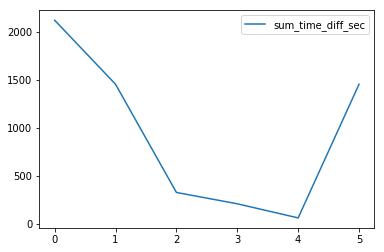

In [162]:
df8_1.plot()